In [4]:
import sklearn

print(sklearn.__version__)

1.5.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})

df = pd.read_csv('household_power_consumption.txt',sep=";")

<ipython-input-5-edd6be5b6ed2>:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt',sep=";")


In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [8]:
# Feature Modification
from sklearn.impute import SimpleImputer

df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df.replace(['?', 'nan', np.nan], -1, inplace=True)
num_vars= ['Global_active_power', 'Global_reactive_power', 'Voltage',
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_vars:
    df[i] = pd.to_numeric(df[i])
imp = SimpleImputer(missing_values=-1, strategy='mean')
df[num_vars] = imp.fit_transform(df[num_vars])

# Target Variable
df['power_consumption'] = (df['Global_active_power']*1000/60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


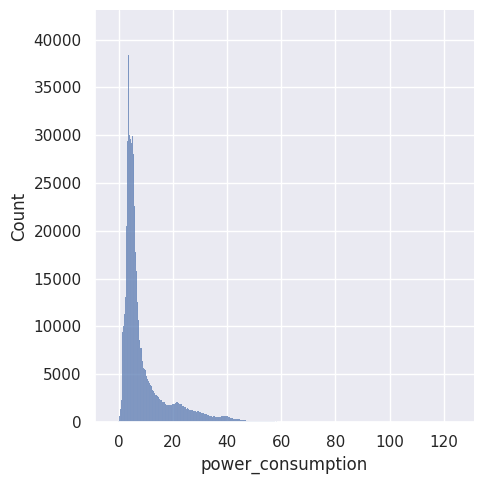

In [10]:
sns.displot(data=df, x='power_consumption')
plt.show()

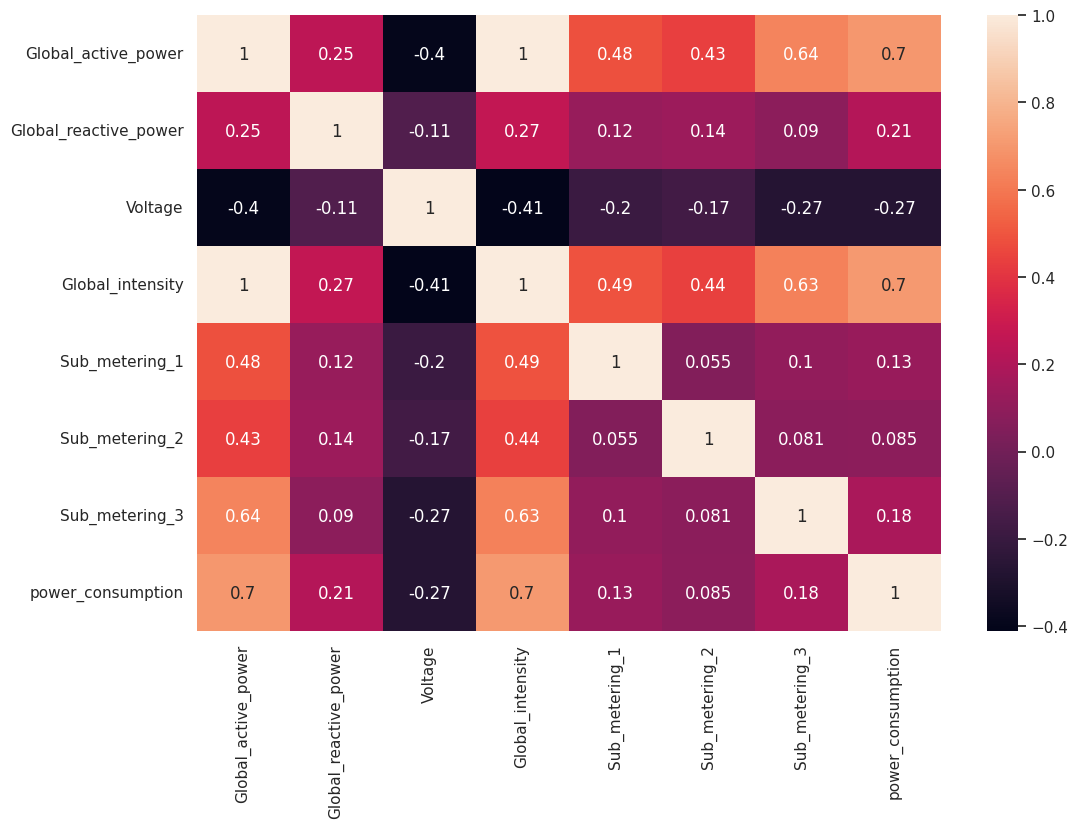

In [15]:
num_vars.append('power_consumption')
sns.heatmap(df[num_vars].corr(), annot=True)
plt.show()

## Train/Test split

In [17]:
from sklearn.model_selection import train_test_split

Y = df['Global_active_power'].values
X_cols = ['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = df[X_cols].values

In [18]:
Y

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

In [19]:
X

array([[  0.418, 234.84 ,  18.4  ,   0.   ,   1.   ,  17.   ],
       [  0.436, 233.63 ,  23.   ,   0.   ,   1.   ,  16.   ],
       [  0.498, 233.29 ,  23.   ,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.   , 239.82 ,   3.8  ,   0.   ,   0.   ,   0.   ],
       [  0.   , 239.7  ,   3.8  ,   0.   ,   0.   ,   0.   ],
       [  0.   , 239.55 ,   3.8  ,   0.   ,   0.   ,   0.   ]])

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

In [21]:
len(X)

2075259

In [22]:
len(X_train)

1660207

In [23]:
len(X_test)

415052

In [28]:
X_test[0]

array([2.2200e-01, 2.4718e+02, 1.8000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00])

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def get_metrics(Y_test, pred):
  r2 = r2_score(Y_test, pred)
  mae = mean_absolute_error(Y_test, pred)
  mse = mean_squared_error(Y_test, pred, squared=True)
  rmse = mean_squared_error(Y_test, pred, squared=False)
  return {'r2':r2, 'mae':mae, 'mse':mse,'rmse':rmse}

In [45]:
models = {}
coefs = {}

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)
prediction = linear_model.predict(X_test)
models['linear'] = get_metrics(Y_test, prediction)
coefs['linear'] = linear_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
from sklearn.linear_model import Ridge

alpha = 0.5

ridge_model = Ridge(alpha=alpha, random_state=13)
ridge_model.fit(X_train, Y_train)
prediction = ridge_model.predict(X_test)
models['ridge'] = get_metrics(Y_test, prediction)
coefs['ridge'] = ridge_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
from sklearn.linear_model import RidgeCV

alphas = [0.1, 0.5, 0.8]

ridgeCV_model = RidgeCV(alphas=alphas, cv=4, scoring='neg_mean_absolute_error')
ridgeCV_model.fit(X_train, Y_train)
prediction = ridgeCV_model.predict(X_test)
models['ridgeCV'] = get_metrics(Y_test, prediction)
coefs['ridgeCV'] = ridgeCV_model.coef_
print(ridgeCV_model.best_score_)
print(ridgeCV_model.alpha_)

-0.025549684466604935
0.1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.5

lasso_model = Lasso(alpha=alpha, random_state=13)
lasso_model.fit(X_train, Y_train)
prediction = lasso_model.predict(X_test)
models['lasso'] = get_metrics(Y_test, prediction)
coefs['lasso'] = lasso_model.coef_


In [64]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 0.5, 0.1]

lassoCV_model = LassoCV(alphas=alphas, cv=4)
lassoCV_model.fit(X_train, Y_train)
prediction = lassoCV_model.predict(X_test)
models['lassoCV'] = get_metrics(Y_test, prediction)
coefs['lassoCV'] = lassoCV_model.coef_
print(lassoCV_model.alpha_)

0.1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_model.fit(X_train, Y_train)
prediction = elastic_model.predict(X_test)
models['elastic'] = get_metrics(Y_test, prediction)
coefs['elastic'] = elastic_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
from sklearn.linear_model import ElasticNetCV

elasticCV_model = ElasticNetCV(cv=4)
elasticCV_model.fit(X_train, Y_train)
prediction = elasticCV_model.predict(X_test)
models['elasticCV'] = get_metrics(Y_test, prediction)
coefs['elasticCV'] = elasticCV_model.coef_
print(lassoCV_model.alpha_)

0.1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
prediction = tree_model.predict(X_test)
models['decision_tree'] = get_metrics(Y_test, prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
columns = ''
df_coef = pd.DataFrame.from_dict(coefs, orient='index', columns=X_cols).reset_index()
df_coef

,index,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,linear,-0.175489,0.004446,0.238041,-0.000316,-0.00045,0.002175
1,ridge,-0.175484,0.004446,0.238041,-0.000316,-0.00045,0.002175
2,lasso,0.000000,-0.000000,0.206253,0.000000,0.00000,0.004834
3,elastic,0.000000,-0.000000,0.215873,0.000000,0.00000,0.005198
4,ridgeCV,-0.175488,0.004446,0.238041,-0.000316,-0.00045,0.002175
5,lassoCV,-0.000000,0.000000,0.228873,0.000000,0.00000,0.003060
6,elasticCV,-0.000000,0.003581,0.235145,0.000000,-0.00000,0.002702


In [70]:
df_metrics = pd.DataFrame.from_dict(models)
df_metrics

,linear,ridge,lasso,elastic,ridgeCV,lassoCV,elasticCV,decision_tree
r2,0.998503,0.998503,0.986256,0.993499,0.998503,0.997560,0.998171,0.998355
mae,0.025678,0.025678,0.089728,0.059289,0.025678,0.035491,0.029579,0.022340
mse,0.001654,0.001654,0.015180,0.007181,0.001654,0.002695,0.002020,0.001817
rmse,0.040665,0.040665,0.123209,0.084739,0.040665,0.051914,0.044942,0.042628
